<a href="https://colab.research.google.com/github/npr99/PlanningMethods/blob/master/PLAN604_Population_vs_Sample_USCounties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of Survey samples and confidence intervals in American Community Survey Data
 
---
This Google Colab Notebook provides a complete workflow (sequence of steps from start to finish) that will allow you to explore [US Census County and County Equivalents](https://www.census.gov/glossary/#term_Countyandequivalententity). 

This notebook has the fewest number of code blocks and minimal discussion. This notebook is designed to be modified and rerun for different proportions (% Hispanic, % Vacant Housing Units, etc) in the United States.

This notebook compares population proportions found in the 2010 Decennial Census and the 2010 1-year ACS.

This notebook introduces Python concepts of functions or modules and merging data.

A function is a block of organized, reusable code that is used to perform a single, related action. Functions provide better modularity for your application and a high degree of code reusing.

Python gives you many built-in functions like print(), etc. but you can also create your own functions. These functions are called user-defined functions.

For more information on Python Functions see: 
1. https://towardsdatascience.com/function-definition-in-python-bae11c29f4cd

For more help on how to merge data see:
1. https://stackoverflow.com/questions/53645882/pandas-merging-101
2. https://realpython.com/pandas-merge-join-and-concat/



In [163]:
# Python packages required to read in and Census API data
import requests ## Required for the Census API
import pandas as pd # For reading, writing and wrangling data

## Step 1: Obtain Data
The following is a function that provides resuable code to obtain data from Census API. The block of code with the function needs to be run first and then the function can be called in future blocks of code.

In [164]:
def obtain_census_api(
                    state: str = "*",
                    county: str = "*",
                    census_geography: str = 'county:*',
                    vintage: str = "2010", 
                    dataset_name: str = 'dec/sf1',
                    get_vars: str = 'GEO_ID'):

        """General utility for obtaining census from Census API.

        Args:
            state (str): 2-digit FIPS code. Default * for all states
            county (str): 3-digit FIPS code. Default * all counties
            census_geography (str): example '&for=block:*' would be for all blocks
              default is for all counties
            vintage (str): Census Year. Default 2010
            dataset_name (str): Census dataset name. Default Decennial SF1
            for a list of all Census API
            get_vars (str): list of variables to get from the API.

        Returns:
            obj, dict: A dataframe for with Census data

        """
        # Set up hyperlink for Census API
        api_hyperlink = ('https://api.census.gov/data/' + vintage + '/'+dataset_name + '?get=' + get_vars +
                        '&in=state:' + state + '&in=county:' + county + '&for=' + census_geography)

        print("Census API data from: " + api_hyperlink)

        # Obtain Census API JSON Data
        apijson = requests.get(api_hyperlink)

        # Convert the requested json into pandas dataframe
        df = pd.DataFrame(columns=apijson.json()[0], data=apijson.json()[1:])

        return df

## Run Obtain Census API for 2010 Decennial Census
The next block of code calls the function and gets varaibles related to total population and counts of population by sex by age.

For more variables related to sex and age see:

https://api.census.gov/data/2010/dec/sf1/groups/P12.html


In [165]:
get_vars = 'GEO_ID,NAME,P012001,P012002'
        # GEO_ID  = Geographic ID
        # NAME    = Geographic Area Name
        # P012001 = Total
        # P012002 = Total!!Male
dec10_df = obtain_census_api(get_vars = get_vars)
dec10_df.head()

Census API data from: https://api.census.gov/data/2010/dec/sf1?get=GEO_ID,NAME,P012001,P012002&in=state:*&in=county:*&for=county:*


,GEO_ID,NAME,P012001,P012002,state,county
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139


## Run Obtain Census API for 2010 1-year American Community Survey
The next block of code calls the function and gets varaibles related to total population and counts of population by sex and age.
The American Community Survey (ACS) is a survey that is conducted monthly with a random sample of the population. The ACS provides an estimate of the population data collected for the 2010 Census.

The ACS variables include both an estimate and a margin of error.

The ACS also provides detailed profile statistics that include percentages with margins of error.

One example of a Detailed Profile Table is DP05 - Sex by Age:

https://api.census.gov/data/2010/acs/acs1/profile/groups/DP05.html

https://data.census.gov/cedsci/table?tid=ACSDP1Y2010.DP05




In [166]:
# The default for the function is the decenial census. 
# For the ACS we need to change the dataset name
# This information is from https://www.census.gov/data/developers/data-sets/acs-1year.2010.html

dataset_name = 'acs/acs1/profile'
get_vars = 'GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM'
        # GEO_ID  = Geographic ID
        # NAME    = Geographic Area Name
        # DP05_0001 = SEX AND AGE!!Total population
        # DP05_0002 = SEX AND AGE!!Male
        # Notice for ACS Variables we include the Estimate (E) and the 
        ## Margin of error (M)
        # Notice the Data profiles also inlcude Percent Estimates (PE) and
        ## Percent Margins of Error (PM)
acs10_df = obtain_census_api(get_vars = get_vars, dataset_name = dataset_name)
acs10_df.head()

Census API data from: https://api.census.gov/data/2010/acs/acs1/profile?get=GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM&in=state:*&in=county:*&for=county:*


,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,state,county
0,0500000US39151,"Stark County, Ohio",375321,-555555555,182670,807,48.7,0.2,39,151
1,0500000US39153,"Summit County, Ohio",541565,-555555555,261973,756,48.4,0.1,39,153
2,0500000US39155,"Trumbull County, Ohio",209936,-555555555,101446,584,48.3,0.3,39,155
3,0500000US39157,"Tuscarawas County, Ohio",92542,-555555555,45263,265,48.9,0.3,39,157
4,0500000US39165,"Warren County, Ohio",213192,-555555555,107486,692,50.4,0.3,39,165


In [167]:
# The default for the function is the decenial census. 
# For the ACS we need to change the dataset name
# This information is from https://www.census.gov/data/developers/data-sets/acs-1year.2010.html

dataset_name = 'acs/acs1'
get_vars = 'GEO_ID,NAME,B00001_001E'
        # GEO_ID  = Geographic ID
        # NAME    = Geographic Area Name
        # B00001_001E = Sample Size
acs10_samplesize_df = obtain_census_api(get_vars = get_vars, dataset_name = dataset_name)
acs10_samplesize_df.head()

Census API data from: https://api.census.gov/data/2010/acs/acs1?get=GEO_ID,NAME,B00001_001E&in=state:*&in=county:*&for=county:*


,GEO_ID,NAME,B00001_001E,state,county
0,0500000US39109,"Miami County, Ohio",1789,39,109
1,0500000US39113,"Montgomery County, Ohio",7457,39,113
2,0500000US39119,"Muskingum County, Ohio",1524,39,119
3,0500000US39133,"Portage County, Ohio",2400,39,133
4,0500000US39139,"Richland County, Ohio",1896,39,139


## Step 2: Clean Data
Data cleaning is an important step in the data science process. This step is often the hardest and most time consuming. 

### 2.1 Clean Decenial Census Data and Check Results
#### 2.1.2 Make sure variable types are set correctly
The Decenial Census data needs to be converted to integer type variables. Integers represent whole numbers. For Total Population and Total Male Population statistics each number represents a total count of people. 

In [168]:
### 2.1 Set the variable type
dec10_df["P012001"] = dec10_df["P012001"].astype(int)
dec10_df["P012002"] = dec10_df["P012002"].astype(int)

# Generate new variable - Proportion
dec10_df.loc[:,'Percent Male'] = dec10_df['P012002'] / dec10_df['P012001'] * 100
dec10_df.head()

,GEO_ID,NAME,P012001,P012002,state,county,Percent Male
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131,49.014665
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133,49.618947
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135,49.420760
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137,49.443279
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139,48.653906


#### 2.1.2 Use descriptive statistics to check cleaning
A descriptive statistics table is a great way to check to make sure the variables have been created correctly. Descriptive methods summarize the data. Descriptive statistics summarize data with numbers, tables, and graphs. The following block of code creates and formats a table using the `describe` function. The table provides eight descriptive statistics. These include the count, the mean, the standard deviation (std), the minimum (min), the lower quartile (25%), the median (50%), the upper quartile (75%), and the maximum (max).


In [169]:
table1 = dec10_df[['P012001','P012002','Percent Male']].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 1. Descriptive statistics for percent Male by county, 2010 Decennial Census."
table1 = table1.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table1

,count,mean,std,min,25%,50%,75%,max
P012001,"3,221","97,011","309,299",82,"11,310","26,076","65,880","9,818,605"
P012002,"3,221","47,677","151,702",42,"5,681","12,928","32,654","4,839,654"
Percent Male,"3,221",50,2,43,49,50,50,72


### 2.2. Clean ACS Data
#### 2.2.1 Make sure variable types are set correctly
For the ACS data we have both population counts and precents. The percentage estiamtes are not integers - they are "floats" which refers the the decimal place that can float in the number between the integer and the fractional part. Here is more information on Python number types https://www.tutorialspoint.com/python/python_numbers.htm 

In [170]:
### 2.2 Set the variable type
acs10_df["DP05_0001E"] = acs10_df["DP05_0001E"].astype(int)
acs10_df["DP05_0001M"] = acs10_df["DP05_0001M"].astype(int)
acs10_df["DP05_0002E"] = acs10_df["DP05_0002E"].astype(int)
acs10_df["DP05_0002M"] = acs10_df["DP05_0002M"].astype(int)
acs10_df["DP05_0002PE"] = acs10_df["DP05_0002PE"].astype(float)
acs10_df["DP05_0002PM"] = acs10_df["DP05_0002PM"].astype(float)

#### 2.2.2 Use descriptive statistics to check cleaning
A descriptive statistics table is a great way to check to make sure the variables have been created correctly.

In [171]:
table2 = acs10_df[['DP05_0001E','DP05_0001M','DP05_0002E','DP05_0002M','DP05_0002PE','DP05_0002PM']].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 2. Descriptive statistics for percent Male by county, 2010 1-year ACS."
table2 = table2.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table2

,count,mean,std,min,25%,50%,75%,max
DP05_0001E,818,"318,861","558,543","62,971","95,588","154,018","314,120","9,830,420"
DP05_0001M,818,"-552,159,728","43,328,275","-555,555,555","-555,555,555","-555,555,555","-555,555,555","2,353"
DP05_0002E,818,"156,228","274,174","31,329","46,472","76,015","154,579","4,846,952"
DP05_0002M,818,"-7,470,112","64,028,520","-555,555,555",522,658,819,"3,410"
DP05_0002PE,818,49,1,46,48,49,50,60
DP05_0002PM,818,"-7,470,795","64,028,441","-555,555,555",0,0,1,2


**Notice strange values** The Descriptive Statistics Table shows that there are strange values. -555555555. These values represent missing values.

List of Annotation Values:

https://www.census.gov/data/developers/data-sets/acs-1year/notes-on-acs-estimate-and-annotation-values.html

A '-555555555' entry in the margin of error column indicates that the estimate is controlled. A statistical test for sampling variability is not appropriate.

#### 2.2.3 Replace Missing Data Codes
To replace the missing values we can use a command that will locate (.loc) observations where the value is missing and replace the value with a new value. The new value will be a special case for values that should be missing. A missing value can be included using the Python Package Numpy, which has a function called nan which replaces the -5555555555 values with "Not A Number" constant. https://numpy.org/doc/stable/reference/constants.html 

In [172]:
import numpy as np
acs10_df.loc[(acs10_df["DP05_0001M"] == -555555555), "DP05_0001M"] = np.nan
acs10_df.loc[(acs10_df["DP05_0002M"] == -555555555), "DP05_0002M"] = np.nan
acs10_df.loc[(acs10_df["DP05_0002PM"] == -555555555), "DP05_0002PM"] = np.nan

#### 2.2.4 Recheck descriptive statistics to double check cleaning
A new descriptive statistics table will help to show that the data cleaning step has worked succesfully.

In [173]:
table3 = acs10_df[['DP05_0001E','DP05_0001M','DP05_0002E','DP05_0002M','DP05_0002PE','DP05_0002PM']].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 3. Descriptive statistics for percent Male by county, 2010 1-year ACS."
table3 = table3.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table3

,count,mean,std,min,25%,50%,75%,max
DP05_0001E,818,"318,861","558,543","62,971","95,588","154,018","314,120","9,830,420"
DP05_0001M,5,"1,682",953,45,"1,712","1,966","2,332","2,353"
DP05_0002E,818,"156,228","274,174","31,329","46,472","76,015","154,579","4,846,952"
DP05_0002M,807,693,269,129,529,662,820,"3,410"
DP05_0002PE,818,49,1,46,48,49,50,60
DP05_0002PM,807,0,0,0,0,0,1,2


### 2.3 Clean ACS Sample Size Data

In [174]:
### 2.3 Set the variable type
acs10_samplesize_df["B00001_001E"] = acs10_samplesize_df["B00001_001E"].astype(int)

table4 = acs10_samplesize_df[['B00001_001E']].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 4. Descriptive statistics for sample size by county, 2010 1-year ACS."
table4 = table4.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table4

,count,mean,std,min,25%,50%,75%,max
B00001_001E,818,"4,272","6,853",637,"1,456","2,295","4,329","123,731"


## Step 3: Merge Data together
Merging data together is a powerful tool in data science workflows. Merge data refers to combining data that represent the same unit of analysis. In this example all three datasets represent counties in the US. Each dataframe has a common variable called GEO_ID which uniquely identifies the counties.

Here is a good overview of data merging in python:
https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738

### 3.1 - Merge Part 1 - Combine Decennial Census with ACS Data

In [175]:
dec10_df.head()

,GEO_ID,NAME,P012001,P012002,state,county,Percent Male
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131,49.014665
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133,49.618947
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135,49.420760
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137,49.443279
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139,48.653906


In [176]:
acs10_df.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,state,county
0,0500000US39151,"Stark County, Ohio",375321,NaN,182670,807.0,48.7,0.2,39,151
1,0500000US39153,"Summit County, Ohio",541565,NaN,261973,756.0,48.4,0.1,39,153
2,0500000US39155,"Trumbull County, Ohio",209936,NaN,101446,584.0,48.3,0.3,39,155
3,0500000US39157,"Tuscarawas County, Ohio",92542,NaN,45263,265.0,48.9,0.3,39,157
4,0500000US39165,"Warren County, Ohio",213192,NaN,107486,692.0,50.4,0.3,39,165


In [177]:
merge_pt1_df = pd.merge(left = dec10_df,
                    right = acs10_df,
                    left_on = 'GEO_ID',
                    right_on = 'GEO_ID',
                    how = 'outer')
merge_pt1_df.head()

,GEO_ID,NAME_x,P012001,P012002,state_x,county_x,Percent Male,NAME_y,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,state_y,county_y
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131,49.014665,"Sebastian County, Arkansas",125920.0,NaN,61024.0,840.0,48.5,0.7,05,131
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133,49.618947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135,49.420760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137,49.443279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139,48.653906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 - Merge Part 2 - Combine Merge Part 1 with ACS Sample Size Data

In [178]:
acs10_samplesize_df.head()

,GEO_ID,NAME,B00001_001E,state,county
0,0500000US39109,"Miami County, Ohio",1789,39,109
1,0500000US39113,"Montgomery County, Ohio",7457,39,113
2,0500000US39119,"Muskingum County, Ohio",1524,39,119
3,0500000US39133,"Portage County, Ohio",2400,39,133
4,0500000US39139,"Richland County, Ohio",1896,39,139


In [179]:
merge_pt2_df = pd.merge(left = merge_pt1_df,
                    right = acs10_samplesize_df,
                    left_on = 'GEO_ID',
                    right_on = 'GEO_ID',
                    how = 'outer')
merge_pt2_df.head()

,GEO_ID,NAME_x,P012001,P012002,state_x,county_x,Percent Male,NAME_y,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,state_y,county_y,NAME,B00001_001E,state,county
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131,49.014665,"Sebastian County, Arkansas",125920.0,NaN,61024.0,840.0,48.5,0.7,05,131,"Sebastian County, Arkansas",1518.0,05,131
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133,49.618947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135,49.420760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137,49.443279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139,48.653906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.3 Clean Up Merge File
Notice that the merge file has several columns (variables) that have repeated information. All three datafiles had a column called `name`. The name column is a good way to see that the merge has worked correctly. In this step we will also rename the columns.

In [180]:
# Check that the names match
merge_pt2_df.loc[(merge_pt2_df['NAME_x']==merge_pt2_df['NAME_y']),'Name Matches pt 1'] = 1
merge_pt2_df.loc[(merge_pt2_df['NAME_x']==merge_pt2_df['NAME']),'Name Matches pt 2'] = 1
merge_pt2_df[['Name Matches pt 1','Name Matches pt 2']].describe().T

,count,mean,std,min,25%,50%,75%,max
Name Matches pt 1,817.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Name Matches pt 2,817.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [181]:
## The name columns match - we can drop the repeated columns
merge_pt2_df = merge_pt2_df.drop(['NAME_y','NAME','Name Matches pt 1','Name Matches pt 2'], axis = 1)
merge_pt2_df.head()

,GEO_ID,NAME_x,P012001,P012002,state_x,county_x,Percent Male,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,state_y,county_y,B00001_001E,state,county
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131,49.014665,125920.0,NaN,61024.0,840.0,48.5,0.7,05,131,1518.0,05,131
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133,49.618947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135,49.420760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137,49.443279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139,48.653906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
## The state and county columns also match - we can drop the repeated columns
merge_pt2_df = merge_pt2_df.drop(['state_y','county_y','state','county'], axis = 1)
merge_pt2_df.head()

,GEO_ID,NAME_x,P012001,P012002,state_x,county_x,Percent Male,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,B00001_001E
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131,49.014665,125920.0,NaN,61024.0,840.0,48.5,0.7,1518.0
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133,49.618947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135,49.420760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137,49.443279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139,48.653906,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.4 Rename Columns

In [183]:
merge_pt2_df = merge_pt2_df.rename(columns={"NAME_x": "County Name", 
                                            "state_x": "State FIPS Code",
                                            "county_x": "County FIPS Code",
                                            "P012001": "Total Population April 1 2010", 
                                            "P012002": "Total Male Population April 1 2010",
                                            "Percent Male": "Percent Male April 1 2010",
                                            "DP05_0001E": "Total Population ACS 2010 (estimate)",
                                            "DP05_0001M":  "Total Population ACS 2010 (MOE)",
                                            "DP05_0002E": "Total Male Population ACS 2010 (estimate)",
                                            "DP05_0002M":  "Total Male Population ACS 2010 (MOE)",
                                            "DP05_0002PE": "Percent Male Population ACS 2010 (estimate)",
                                            "DP05_0002PM":  "Percent Male Population ACS 2010 (MOE)",
                                            "B00001_001E": "Sample Size ACS 2010"
                                            })
merge_pt2_df.head()

,GEO_ID,County Name,Total Population April 1 2010,Total Male Population April 1 2010,State FIPS Code,County FIPS Code,Percent Male April 1 2010,Total Population ACS 2010 (estimate),Total Population ACS 2010 (MOE),Total Male Population ACS 2010 (estimate),Total Male Population ACS 2010 (MOE),Percent Male Population ACS 2010 (estimate),Percent Male Population ACS 2010 (MOE),Sample Size ACS 2010
0,0500000US05131,"Sebastian County, Arkansas",125744,61633,05,131,49.014665,125920.0,NaN,61024.0,840.0,48.5,0.7,1518.0
1,0500000US05133,"Sevier County, Arkansas",17058,8464,05,133,49.618947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US05135,"Sharp County, Arkansas",17264,8532,05,135,49.420760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US05137,"Stone County, Arkansas",12394,6128,05,137,49.443279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US05139,"Union County, Arkansas",41639,20259,05,139,48.653906,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1 Add Percent Sample Size
Look at range of how sample size relates to population size.

In [200]:
merge_pt2_df.loc[:,'Percent Sample Size'] = merge_pt2_df['Sample Size ACS 2010'] / merge_pt2_df['Total Population April 1 2010'] * 100
merge_pt2_df['Percent Sample Size'].describe()

count    818.000000
mean       1.470118
std        0.359547
min        0.985077
25%        1.251849
50%        1.377231
75%        1.567733
max        3.867175
Name: Percent Sample Size, dtype: float64

In [206]:
merge_pt2_df.head()

,GEO_ID,County Name,Total Population April 1 2010,Total Male Population April 1 2010,State FIPS Code,County FIPS Code,Percent Male April 1 2010,Total Population ACS 2010 (estimate),Total Population ACS 2010 (MOE),Total Male Population ACS 2010 (estimate),Total Male Population ACS 2010 (MOE),Percent Male Population ACS 2010 (estimate),Percent Male Population ACS 2010 (MOE),Sample Size ACS 2010,Estimate Lower Bound,Estimate Upper Bound,Parameter within Confidence Interval,Parameter minus Estimate,Percent Male Population ACS 2010 (SE),Parameter SE from Estimate,Percent Sample Size
1346,0500000US48301,"Loving County, Texas",82,46,48,301,56.097561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2603,0500000US15005,"Kalawao County, Hawaii",90,42,15,005,46.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,0500000US48269,"King County, Texas",286,141,48,269,49.300699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325,0500000US48261,"Kenedy County, Texas",416,212,48,261,50.961538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2421,0500000US31005,"Arthur County, Nebraska",460,228,31,005,49.565217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


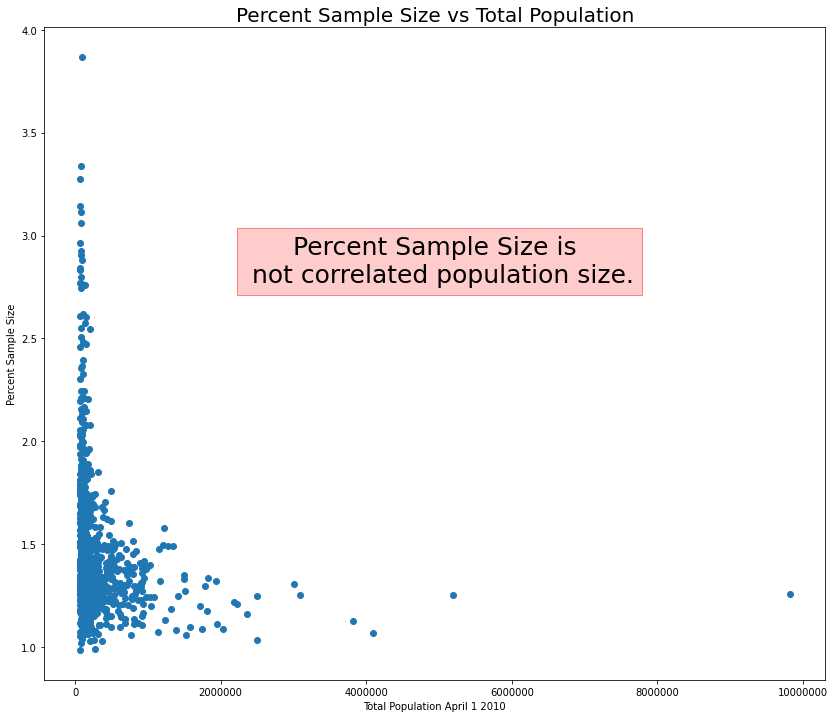

In [220]:
# Scatter Plot
plt.figure(figsize=(14, 12))
plt.scatter(merge_pt2_df["Total Population April 1 2010"], merge_pt2_df['Percent Sample Size'])
plt.title("Percent Sample Size vs Total Population",  fontsize=20)
plt.xlabel('Total Population April 1 2010')
plt.ticklabel_format(style='plain')
plt.ylabel("Percent Sample Size")
plt.text(5000000, 3, "Percent Sample Size is \n not correlated population size.", size=25,
         ha="center", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()

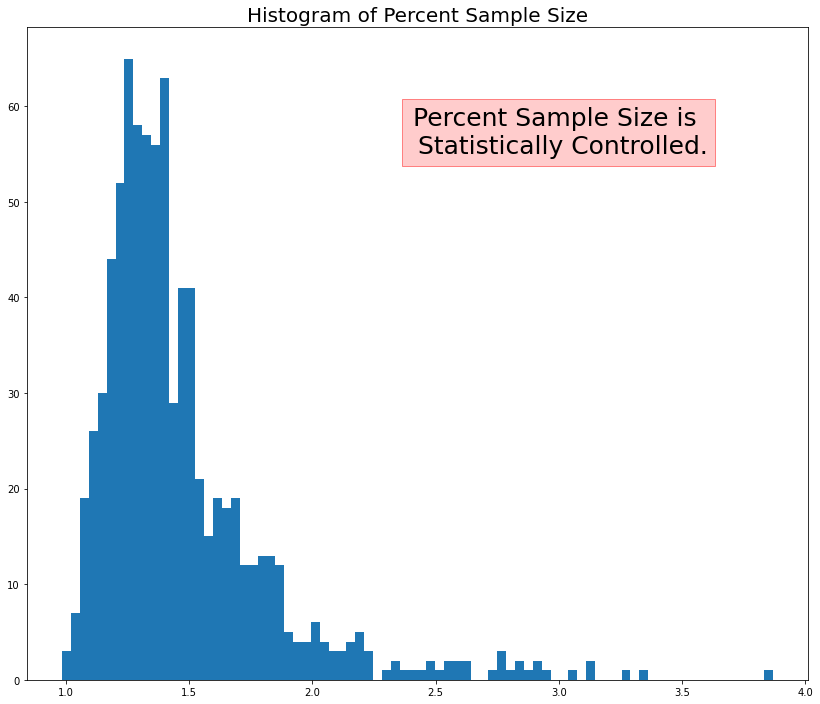

In [222]:
plt.figure(figsize=(14, 12))
plt.hist(merge_pt2_df['Percent Sample Size'],bins = 80)
plt.title("Histogram of Percent Sample Size",  fontsize=20)
plt.text(3, 60, "Percent Sample Size is \n Statistically Controlled.", size=25,
         ha="center", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()

## Step 4: Explore Data
### 4.1 - Why do some counties have ACS data and others do not?

In [184]:
table5 = merge_pt2_df[['Total Population April 1 2010','Total Population ACS 2010 (estimate)']].loc[(merge_pt2_df['Total Population ACS 2010 (estimate)'].isnull())].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 5. Descriptive statistics for total population for counties without ACS data, 2010 Decennial."
table5 = table5.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table5

,count,mean,std,min,25%,50%,75%,max
Total Population April 1 2010,"2,403","21,730","16,010",82,"8,785","17,457","32,466","64,757"
Total Population ACS 2010 (estimate),0,nan,nan,nan,nan,nan,nan,nan


In [185]:
table6 = merge_pt2_df[['Total Population April 1 2010','Total Population ACS 2010 (estimate)']].loc[~(merge_pt2_df['Total Population ACS 2010 (estimate)'].isnull())].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 6. Descriptive statistics for total population for counties with ACS data, 2010 Decennial."
table6 = table6.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table6

,count,mean,std,min,25%,50%,75%,max
Total Population April 1 2010,818,"318,159","557,363","64,665","95,286","153,956","312,155","9,818,605"
Total Population ACS 2010 (estimate),818,"318,861","558,543","62,971","95,588","154,018","314,120","9,830,420"


### ACS 1-year data available for census geographies with population more than 65,000

In [199]:
merge_pt2_df = merge_pt2_df.sort_values(by = 'Total Population April 1 2010')
table7 = merge_pt2_df[['County Name','Total Population April 1 2010','Total Population ACS 2010 (estimate)']].loc[(merge_pt2_df['Total Population April 1 2010'] >= 64000) &
                 (merge_pt2_df['Total Population April 1 2010'] <= 66000) ]
varformat = {"Total Population April 1 2010": "{:,.0f}", 
             "Total Population ACS 2010 (estimate)": "{:,.0f}"}
table_title = "Table 7. Total population for counties around 65,000 peoople for Decennial and ACS data, 2010."
table7 = table7.style.set_caption(table_title).set_properties(**{'text-align': 'right'}).format(varformat)
table7

,County Name,Total Population April 1 2010,Total Population ACS 2010 (estimate)
1839,"Blue Earth County, Minnesota","64,013",nan
2541,"Spalding County, Georgia","64,073",nan
2307,"Rice County, Minnesota","64,142",nan
1226,"Reno County, Kansas","64,511",nan
489,"Herkimer County, New York","64,519",nan
1165,"Nacogdoches County, Texas","64,524",nan
26,"Lake County, California","64,665","64,771"
641,"Lea County, New Mexico","64,727",nan
1279,"Athens County, Ohio","64,757",nan
1196,"San Patricio County, Texas","64,804","64,586"


## 4.2 Compare ACS Estimate with Decennial Census Parameter

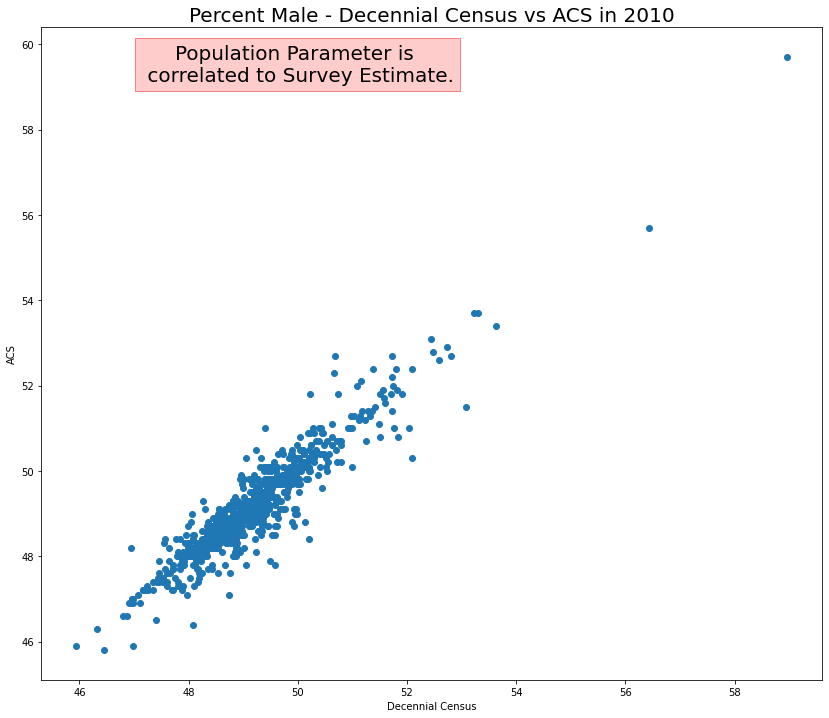

In [187]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(14, 12))
plt.scatter(merge_pt2_df["Percent Male April 1 2010"], merge_pt2_df["Percent Male Population ACS 2010 (estimate)"])
plt.title('Percent Male - Decennial Census vs ACS in 2010',  fontsize=20)
plt.xlabel("Decennial Census")
plt.ylabel('ACS')
plt.text(50, 60, "Population Parameter is \n correlated to Survey Estimate.", size=20,
         ha="center", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()

### How often was the population parameter inside the estimate confidence interval?

In [188]:
merge_pt2_df.loc[:,'Estimate Lower Bound'] = merge_pt2_df["Percent Male Population ACS 2010 (estimate)"] - merge_pt2_df["Percent Male Population ACS 2010 (MOE)"]
merge_pt2_df.loc[:,'Estimate Upper Bound'] = merge_pt2_df["Percent Male Population ACS 2010 (estimate)"] + merge_pt2_df["Percent Male Population ACS 2010 (MOE)"]
merge_pt2_df.head()

,GEO_ID,County Name,Total Population April 1 2010,Total Male Population April 1 2010,State FIPS Code,County FIPS Code,Percent Male April 1 2010,Total Population ACS 2010 (estimate),Total Population ACS 2010 (MOE),Total Male Population ACS 2010 (estimate),Total Male Population ACS 2010 (MOE),Percent Male Population ACS 2010 (estimate),Percent Male Population ACS 2010 (MOE),Sample Size ACS 2010,Estimate Lower Bound,Estimate Upper Bound
1346,0500000US48301,"Loving County, Texas",82,46,48,301,56.097561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2603,0500000US15005,"Kalawao County, Hawaii",90,42,15,005,46.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,0500000US48269,"King County, Texas",286,141,48,269,49.300699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325,0500000US48261,"Kenedy County, Texas",416,212,48,261,50.961538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2421,0500000US31005,"Arthur County, Nebraska",460,228,31,005,49.565217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
merge_pt2_df.loc[(merge_pt2_df["Percent Male April 1 2010"] >= merge_pt2_df['Estimate Lower Bound']) &
                 (merge_pt2_df["Percent Male April 1 2010"] <= merge_pt2_df['Estimate Upper Bound']),'Parameter within Confidence Interval'] = 1
merge_pt2_df.loc[(merge_pt2_df["Percent Male April 1 2010"] < merge_pt2_df['Estimate Lower Bound']) ,'Parameter within Confidence Interval'] = 0
merge_pt2_df.loc[(merge_pt2_df["Percent Male April 1 2010"] > merge_pt2_df['Estimate Upper Bound']) ,'Parameter within Confidence Interval'] = 0
merge_pt2_df.loc[(merge_pt2_df['Estimate Lower Bound'].isnull()) ,'Parameter within Confidence Interval'] = np.nan
merge_pt2_df['Parameter within Confidence Interval'].describe()

count    807.000000
mean       0.824040
std        0.381023
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Parameter within Confidence Interval, dtype: float64

In [190]:
merge_pt2_df.loc[:,'Parameter minus Estimate'] = merge_pt2_df["Percent Male April 1 2010"] - merge_pt2_df["Percent Male Population ACS 2010 (estimate)"]
merge_pt2_df['Parameter minus Estimate'].describe()

count    818.000000
mean       0.008826
std        0.419756
min       -2.017828
25%       -0.171638
50%       -0.007309
75%        0.184919
max        1.811088
Name: Parameter minus Estimate, dtype: float64

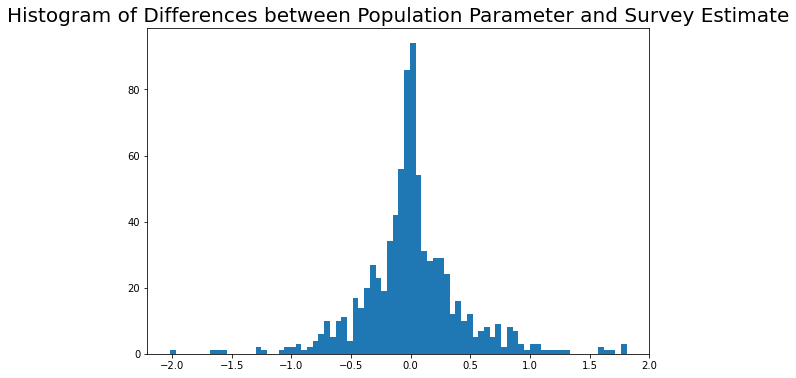

In [191]:
plt.figure(figsize=(9, 6))
plt.hist(merge_pt2_df['Parameter minus Estimate'],bins = 80)
plt.title("Histogram of Differences between Population Parameter and Survey Estimate",  fontsize=20)
plt.show()

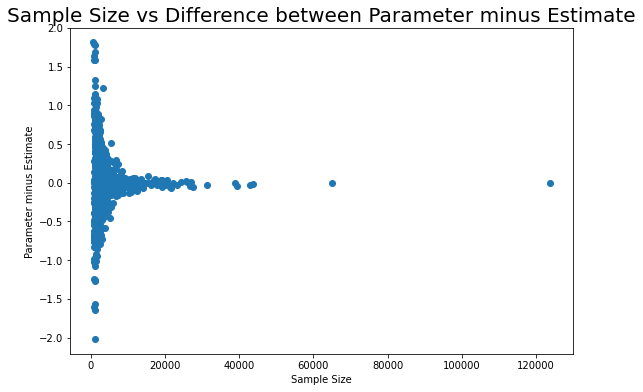

In [192]:
# Scatter Plot
plt.figure(figsize=(9, 6))
plt.scatter(merge_pt2_df["Sample Size ACS 2010"], merge_pt2_df["Parameter minus Estimate"])
plt.title('Sample Size vs Difference between Parameter minus Estimate',  fontsize=20)
plt.xlabel("Sample Size")
plt.ylabel('Parameter minus Estimate')
plt.show()

### Look at Standard Errors
Instead of the difference between Population Paramter and Survey Estimate look at the number of Standard Errors the Population Parameter is from the survey estimate.

In [193]:
merge_pt2_df.loc[:,"Percent Male Population ACS 2010 (SE)"] = merge_pt2_df["Percent Male Population ACS 2010 (MOE)"] / 1.645
merge_pt2_df["Percent Male Population ACS 2010 (SE)"].describe()

count    807.000000
mean       0.298452
std        0.216620
min        0.060790
25%        0.121581
50%        0.243161
75%        0.425532
max        1.458967
Name: Percent Male Population ACS 2010 (SE), dtype: float64

In [194]:
merge_pt2_df.loc[:,'Parameter SE from Estimate'] = (merge_pt2_df['Parameter minus Estimate'] / merge_pt2_df["Percent Male Population ACS 2010 (SE)"])
merge_pt2_df['Parameter SE from Estimate'].describe()

count    807.000000
mean      -0.017162
std        1.208013
min       -3.333568
25%       -0.812244
50%       -0.066313
75%        0.773236
max        4.345792
Name: Parameter SE from Estimate, dtype: float64

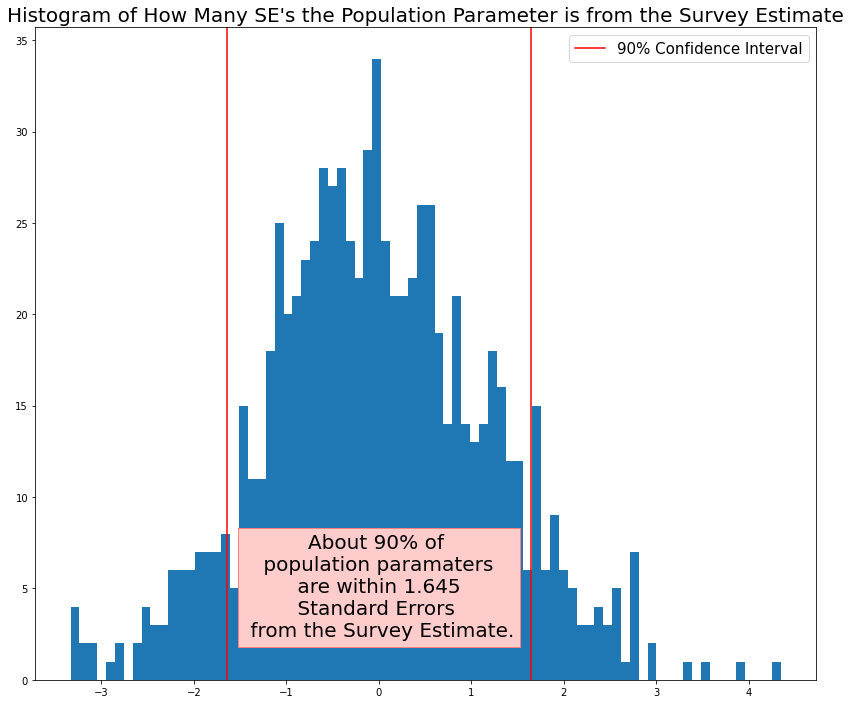

In [195]:
plt.figure(figsize=(14, 12))
plt.hist(merge_pt2_df['Parameter SE from Estimate'],bins = 80)
plt.axvline(x=-1.645, color='red')
plt.axvline(x=1.645, label='90% Confidence Interval', color='red')
plt.legend(fontsize = 15)
plt.title("Histogram of How Many SE's the Population Parameter is from the Survey Estimate",  fontsize=20)
plt.text(0, 8, "About 90% of \n population paramaters \n are within 1.645 \n Standard Errors  \n from the Survey Estimate.", size=20,
         ha="center", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()

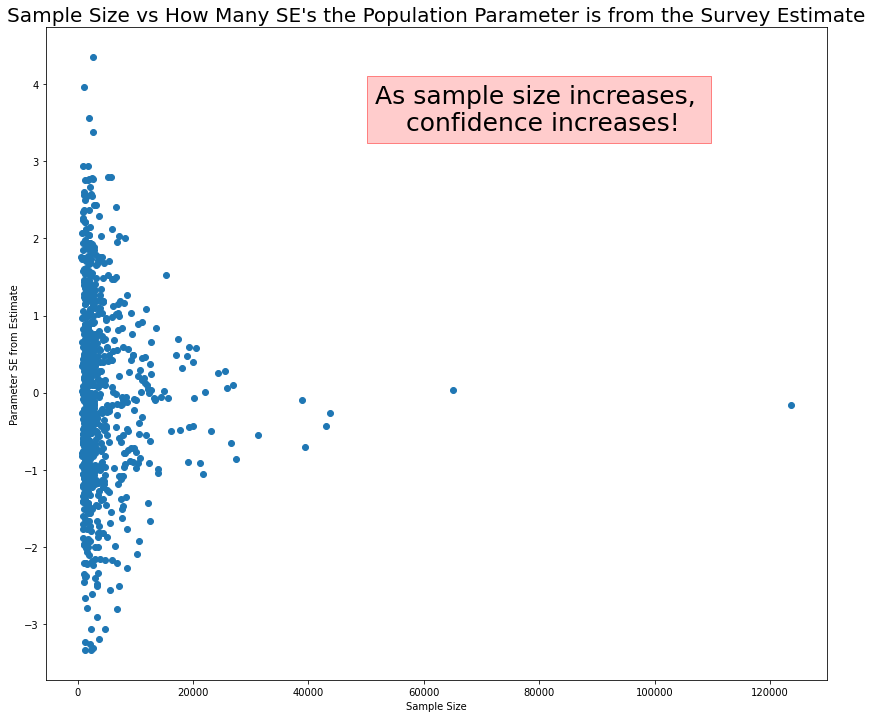

In [196]:
# Scatter Plot
plt.figure(figsize=(14, 12))
plt.scatter(merge_pt2_df["Sample Size ACS 2010"], merge_pt2_df['Parameter SE from Estimate'])
plt.title("Sample Size vs How Many SE's the Population Parameter is from the Survey Estimate",  fontsize=20)
plt.xlabel("Sample Size")
plt.ylabel('Parameter SE from Estimate')
plt.text(80000, 4, "As sample size increases, \n confidence increases!", size=25,
         ha="center", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()

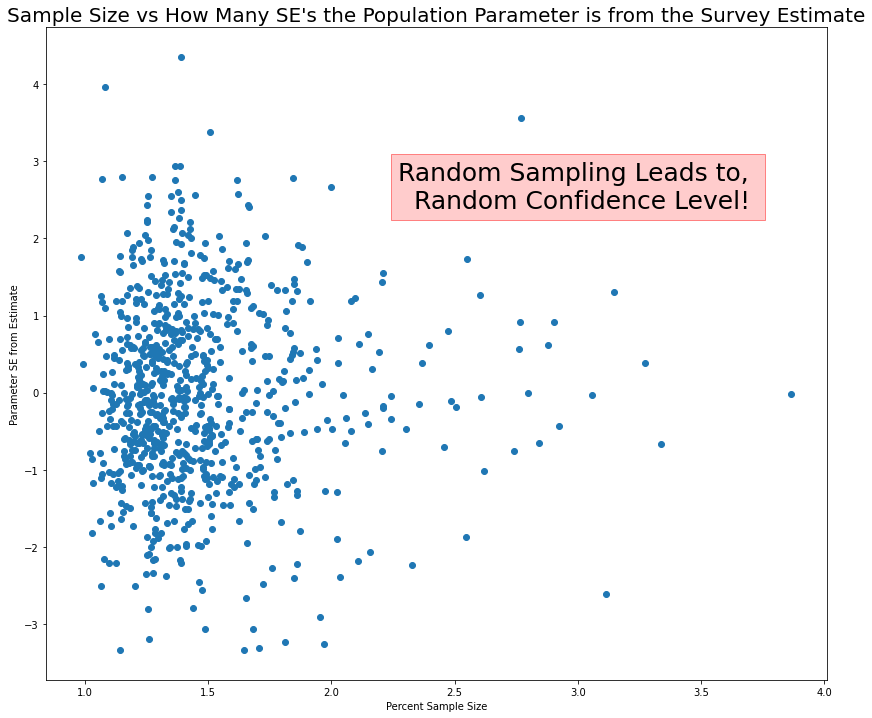

In [223]:
# Scatter Plot
plt.figure(figsize=(14, 12))
plt.scatter(merge_pt2_df["Percent Sample Size"], merge_pt2_df['Parameter SE from Estimate'])
plt.title("Sample Size vs How Many SE's the Population Parameter is from the Survey Estimate",  fontsize=20)
plt.xlabel("Percent Sample Size")
plt.ylabel('Parameter SE from Estimate')
plt.text(3, 3, "Random Sampling Leads to, \n Random Confidence Level!", size=25,
         ha="center", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()

## As sample size increases confidence level increases!

In [197]:
merge_pt2_df['Parameter SE from Estimate'].quantile([0.01, 0.05, 0.1,0.90, 0.95, 0.99])

0.01   -2.901389
0.05   -1.989567
0.10   -1.462797
0.90    1.537681
0.95    1.998981
0.99    2.785686
Name: Parameter SE from Estimate, dtype: float64

### Compare the percentiles to critical values
Notice that the percentiles are close to the z-score critical values for desired level of confidence.

- 1.645 for 90 perenct critical level
- 1.960 for 95 percent critical level
- 2.576 for 99 percent critical level